In [1]:
import pandas                  as     pd
from   sklearn.model_selection import train_test_split
from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.metrics         import accuracy_score, confusion_matrix
from   sklearn.ensemble        import RandomForestClassifier
from   xgboost                 import XGBClassifier
from   sklearn.ensemble        import StackingClassifier
from   sklearn.linear_model    import LogisticRegression
from   sklearn.svm             import SVC

# **Vaisseau spatial Titanic**

In [2]:
train       = pd.read_csv('SpaceshipTitanic_Train.csv')
test        = pd.read_csv('SpaceshipTitanic_Test.csv')
passengerid = test["PassengerId"]

In [3]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Il manque des valeurs dans beaucoup de colonnes.

In [6]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Idem.

## **Traiter les valeurs manquantes**

In [7]:
train.head(30)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
train.tail(30)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8663,9244_01,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock,True
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8665,9247_01,Earth,True,G/1491/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,NaN,Phia Cleang,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8668,9251_01,Mars,True,F/1793/S,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,Melios Kashe,True
8669,9252_01,Europa,False,B/301/P,55 Cancri e,26.0,False,0.0,8160.0,205.0,0.0,438.0,Alchium Stranbeate,True
8670,9252_02,Europa,True,B/301/P,55 Cancri e,19.0,False,0.0,0.0,0.0,0.0,0.0,Muonon Stranbeate,True
8671,9253_01,Earth,True,G/1493/S,PSO J318.5-22,16.0,False,0.0,0.0,0.0,0.0,0.0,Jimmyn Thomason,True
8672,9254_01,Earth,True,G/1502/P,PSO J318.5-22,61.0,False,0.0,0.0,0.0,0.0,0.0,Kenny Mallerez,False


La précédante valeur est répétée à la plupart des lignes.

In [9]:
train.drop(columns=['Name', 'PassengerId'], inplace=True)
test .drop(columns=['Name', 'PassengerId'], inplace=True)

In [10]:
# La méthode `fill` comlète par la valeur précédante
train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].ffill()
test[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = test[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].ffill()

/tmp/ipykernel_518/566776345.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].ffill()
/tmp/ipykernel_518/566776345.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = test[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']].ffill()


In [11]:
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [12]:
test.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

Beaucoup de colonnes ont des valeurs manquantes.

In [13]:
# `Cabin` et `CabinNum` sont inutiles
train.drop(columns=['Cabin'] , inplace=True)
test.drop(columns =['Cabin'] , inplace=True)

array([[%lt;Axes: title={'center': 'Age'}%gt;,
 %lt;Axes: title={'center': 'RoomService'}%gt;],
 [%lt;Axes: title={'center': 'FoodCourt'}%gt;,
 %lt;Axes: title={'center': 'ShoppingMall'}%gt;],
 [%lt;Axes: title={'center': 'Spa'}%gt;,
 %lt;Axes: title={'center': 'VRDeck'}%gt;]], dtype=object)

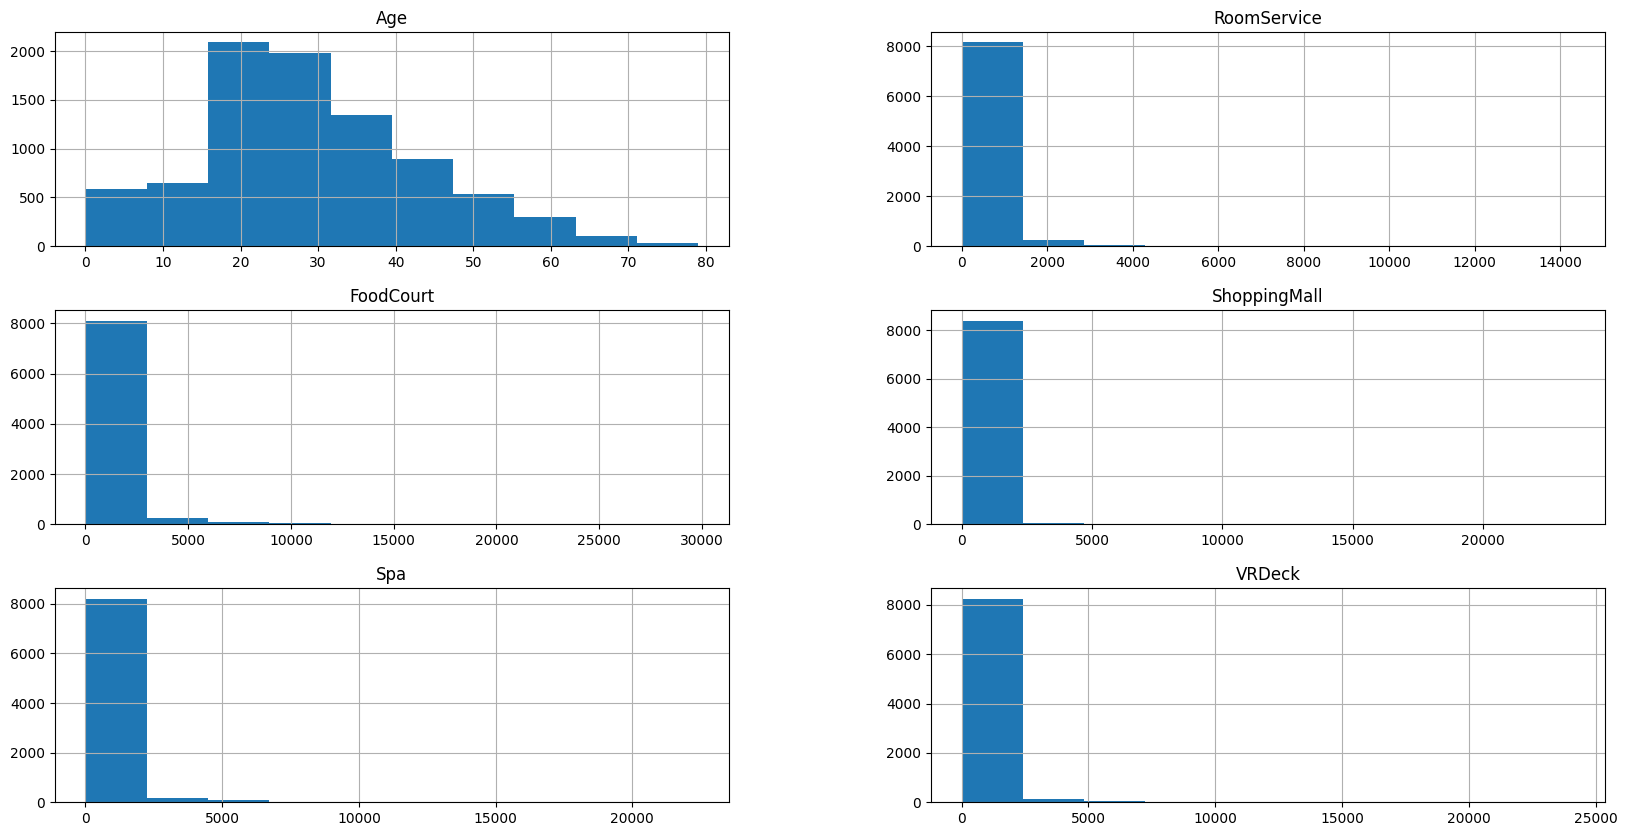

In [14]:
train.hist(figsize=(20, 10))

In [15]:
# Compléter par l'âge moyen. Idem pour RoomService, FoodCart, ShoppingMall, Spa, VRDeck
train['Age']          = train['Age'].fillna(train['Age'].mean())
test['Age']           = test['Age'].fillna(test['Age'].mean())
train['RoomService']  = train['RoomService'].fillna(train['RoomService'].mode()[0])
test['RoomService']   = test['RoomService'].fillna(test['RoomService'].mode()[0])
train['FoodCourt']    = train['FoodCourt'].fillna(train['FoodCourt'].mode()[0])
test['FoodCourt']     = test['FoodCourt'].fillna(test['FoodCourt'].mode()[0])
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mode()[0])
test['ShoppingMall']  = test['ShoppingMall'].fillna(test['ShoppingMall'].mode()[0])
train['Spa']          = train['Spa'].fillna(train['Spa'].mode()[0])
test['Spa']           = test['Spa'].fillna(test['Spa'].mode()[0])
train['VRDeck']       = train['VRDeck'].fillna(train['VRDeck'].mode()[0])
test['VRDeck']        = test['VRDeck'].fillna(test['VRDeck'].mode()[0])

In [16]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [17]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Il n'y a plus de valeur manquante.  
Convertir les colonnes catégorielles et non numériques.

In [18]:
train.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

## **Convertir les colonnes catégorielles et les colonnens non numériques**

In [19]:
# Convertir les boulléens en entiers
train[['CryoSleep', 'VIP', 'Transported']] = train[['CryoSleep', 'VIP', 'Transported']].astype(int)
test[['CryoSleep', 'VIP']] = test[['CryoSleep', 'VIP']].astype(int)

In [20]:
# Utiliser la technique “One-Hot Encoding“
df = pd.get_dummies(train, columns=['HomePlanet', 'Destination'])
pd.set_option('display.max_columns', 100)
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,False,True,False,False,False,True
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,True,False,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,False,True,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,False,True,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,False,True,False,True,False,False
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,False,True,False
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,True,False,False,False,False,True
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,False,True,False,True,False,False


`One-Hot Encoding` est une technique formate les variables en binaire afin que les modèles de machine learning puissent les utiliser efficacement.

Le principe de base
Pour chaque catégorie possible d'une variable, on crée une nouvelle colonne (ou « feature »). Dans chaque ligne, la colonne correspondant à la catégorie présente prend la valeur 1, et toutes les autres prennent 0. Afin de ne pas introduire d'ordre artificiel entre les catégories.

## **Construire les mocèles et prédicitons**

In [21]:
# Répartir
y = df['Transported'].copy()
X = df.drop(columns='Transported').copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Classifier par un arbre décisionnel**

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_prediction = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_prediction)
dtc_accuracy

0.7320299022426682

In [24]:
dtc_confusion_matrix = confusion_matrix(y_test, dtc_prediction)
dtc_confusion_matrix

array([[604, 273],
 [193, 669]])

## **Classifier avec random forest**

In [25]:
rfc = RandomForestClassifier(random_state=786)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)
rfc_accuracy

0.7889591719378953

### **Classificateur XGB**

In [26]:
xgbc = XGBClassifier(random_state=786)
xgbc.fit(X_train, y_train)
xgbc_prediction = xgbc.predict(X_test)
xgbc_accuracy = accuracy_score(y_test, xgbc_prediction)
xgbc_accuracy

0.7889591719378953

Le classificateur en forêt a le même résultat.

### **Approche pour le stacking**

In [27]:
# Modèles de base
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

In [28]:
# Méta-modèle
final_estimator = LogisticRegression()

In [29]:
# Modèle stacking
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [30]:
# Entraînement
stacking_clf.fit(X_train, y_train)

/opt/python/envs/default_3_11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:05:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/python/envs/default_3_11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:05:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/python/envs/default_3_11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:05:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/python/envs/default_3_11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:05:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/python/envs/default

,estimators,"[('dt', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [31]:
# Prédiction et évaluation
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision stacking 👉 {accuracy}")

Précision stacking 👉 0.78953421506613


L'appreche par empilement a fait à peine mieux.  
C'est une méthode d'ensemble learning qui combine plusieurs modèles de machine learning appelés modèles de base pour créer un modèle final plus performant.  

⟹ Le stacking permet d'apprendre comment combiner plusieurs modèles imparfaits mais complémentaires pour créer un modèle final plus puissant et général.